In [1]:
from tensorflow.keras.utils import plot_model

In [2]:
# Pixel Model

from alquimodelia.pixel import Pixel


Pixel_model = Pixel(
            num_bands=10,
            timesteps=12,
            num_classes=3
)

2022-08-23 10:51:17.329103: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-23 10:51:17.334090: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-23 10:51:17.334286: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-23 10:51:17.334685: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

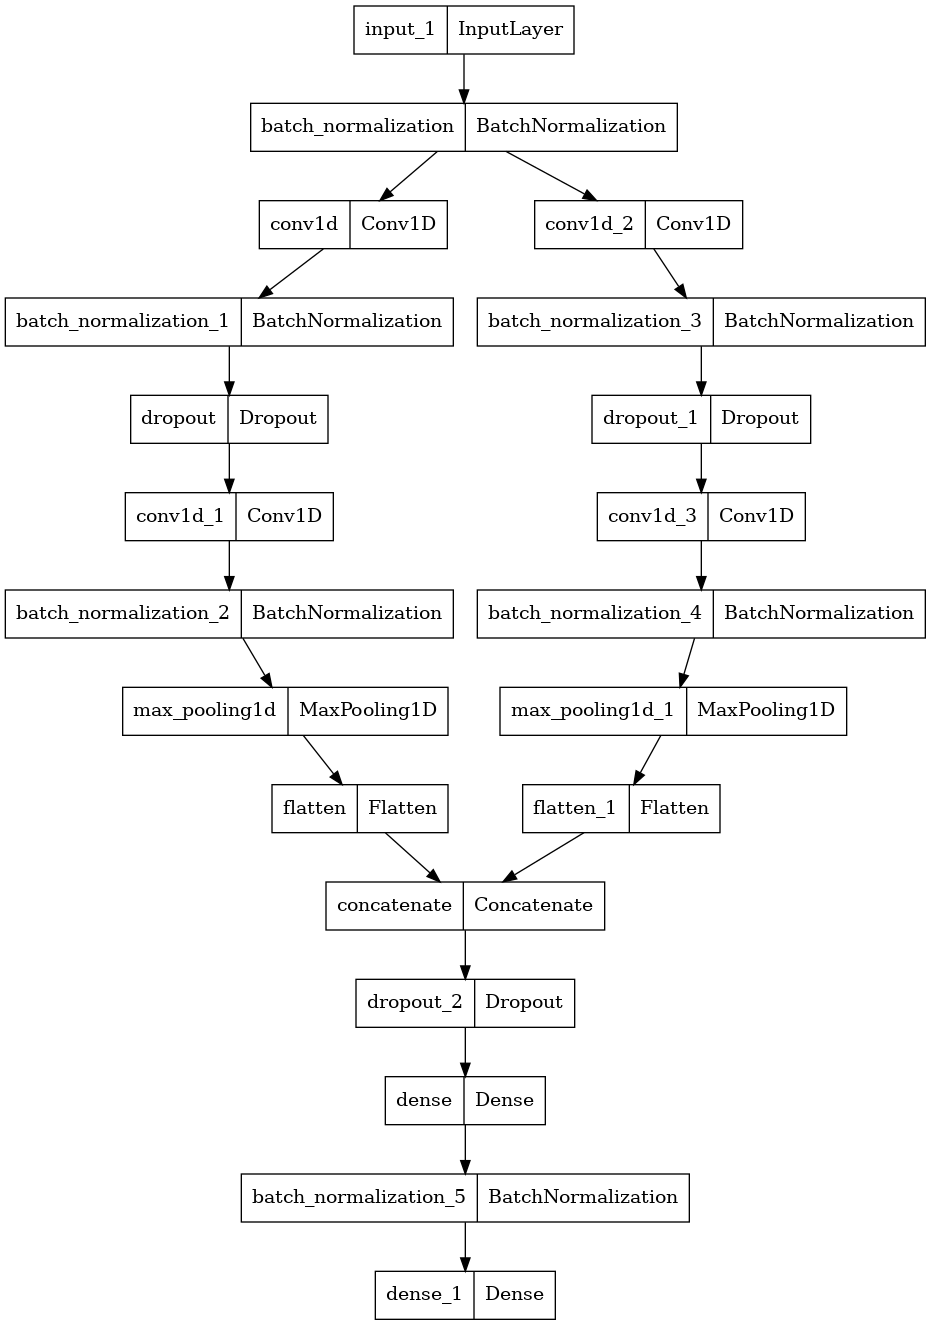

In [3]:
plot_model(Pixel_model)

In [4]:
Pixel_model.summary()

Model: "pixel"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 12, 10)]     0           []                               
                                                                                                  
 batch_normalization (BatchNorm  (None, 12, 10)      40          ['input_1[0][0]']                
 alization)                                                                                       
                                                                                                  
 conv1d (Conv1D)                (None, 10, 64)       1984        ['batch_normalization[0][0]']    
                                                                                                  
 conv1d_2 (Conv1D)              (None, 8, 64)        3264        ['batch_normalization[0][0]']

In [5]:
# 2D Model

from alquimodelia.unet_arch import UNet2D, UNet3D


UNet2D_model = UNet2D(
        n_filters=16,
        number_of_conv_layers=None,
        kernel_size=3,
        batchnorm=True,
        padding_style="same",
        activation="relu",
        kernel_initializer="he_normal",
        timesteps=12,
        width=600,
        height=600,
        padding=None,
        num_bands=10,
        num_classes=4,
        activation_final=None,
        data_format="channels_last",
)

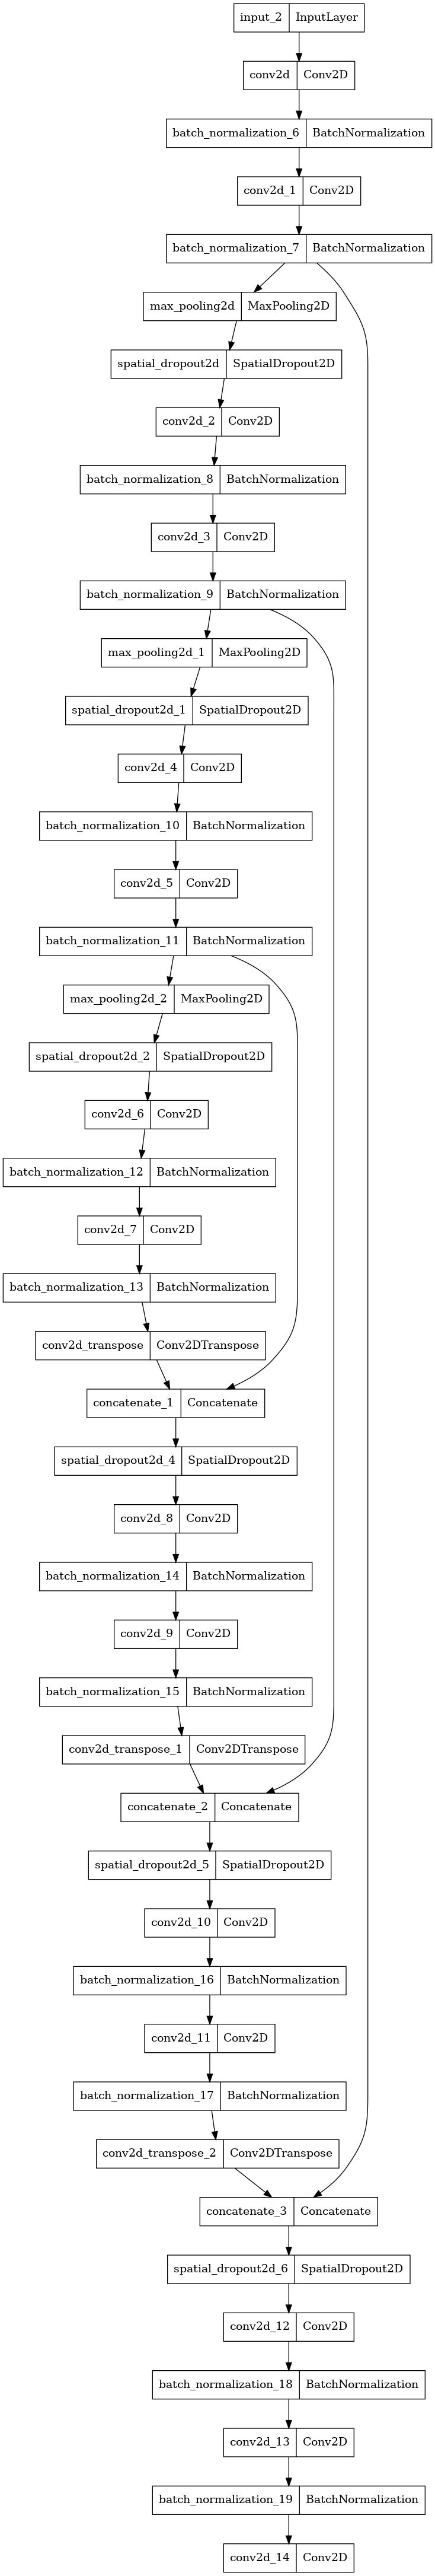

In [6]:
plot_model(UNet2D_model)

In [7]:
UNet2D_model.summary()

Model: "u_net2d"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 600, 600, 1  0           []                               
                                0)]                                                               
                                                                                                  
 conv2d (Conv2D)                (None, 600, 600, 16  1456        ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_6 (BatchNo  (None, 600, 600, 16  64         ['conv2d[0][0]']                 
 rmalization)                   )                                                           

                                                                                                  
 conv2d_9 (Conv2D)              (None, 150, 150, 64  36928       ['batch_normalization_14[0][0]'] 
                                )                                                                 
                                                                                                  
 batch_normalization_15 (BatchN  (None, 150, 150, 64  256        ['conv2d_9[0][0]']               
 ormalization)                  )                                                                 
                                                                                                  
 conv2d_transpose_1 (Conv2DTran  (None, 300, 300, 32  18464      ['batch_normalization_15[0][0]'] 
 spose)                         )                                                                 
                                                                                                  
 concatena

In [8]:
UNet3D_model = UNet3D(
        n_filters=16,
        number_of_conv_layers=None,
        kernel_size=3,
        batchnorm=True,
        padding_style="same",
        activation="relu",
        kernel_initializer="he_normal",
        timesteps=12,
        width=600,
        height=600,
        padding=None,
        num_bands=10,
        num_classes=4,
        activation_final=None,
        data_format="channels_last",
)

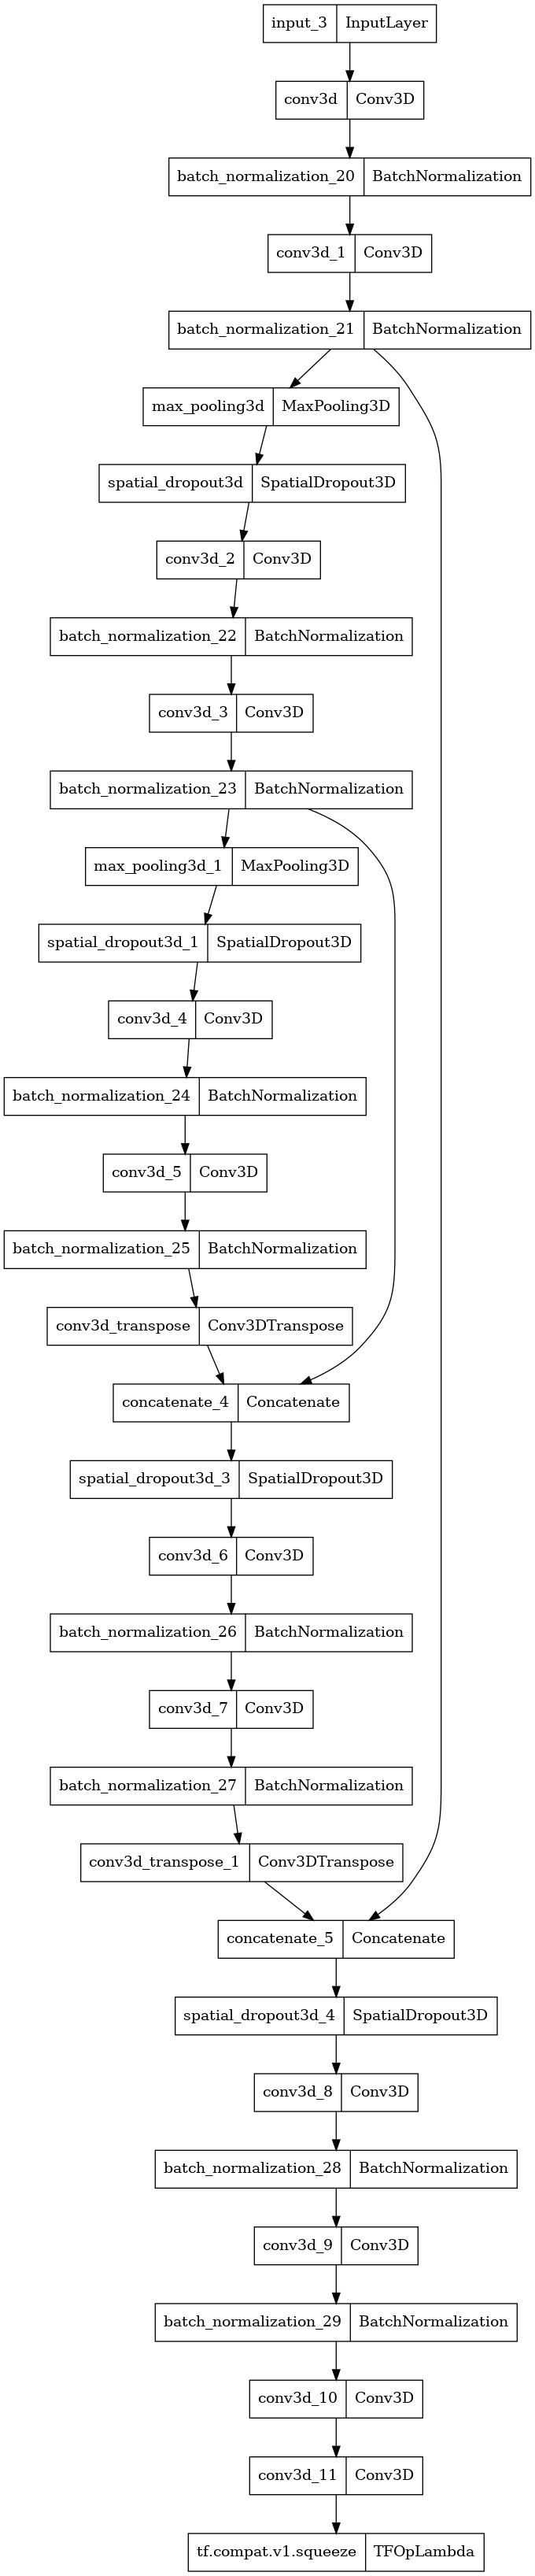

In [10]:
plot_model(UNet3D_model)

In [11]:
UNet3D_model.summary()

Model: "u_net3d"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 12, 600, 60  0           []                               
                                0, 10)]                                                           
                                                                                                  
 conv3d (Conv3D)                (None, 12, 600, 600  4336        ['input_3[0][0]']                
                                , 16)                                                             
                                                                                                  
 batch_normalization_20 (BatchN  (None, 12, 600, 600  64         ['conv3d[0][0]']                 
 ormalization)                  , 16)                                                       

                                                                                                  
 conv3d_8 (Conv3D)              (None, 12, 600, 600  13840       ['spatial_dropout3d_4[0][0]']    
                                , 16)                                                             
                                                                                                  
 batch_normalization_28 (BatchN  (None, 12, 600, 600  64         ['conv3d_8[0][0]']               
 ormalization)                  , 16)                                                             
                                                                                                  
 conv3d_9 (Conv3D)              (None, 12, 600, 600  6928        ['batch_normalization_28[0][0]'] 
                                , 16)                                                             
                                                                                                  
 batch_nor